## Introducción

### ¿Qué automóvil de lujo, con buenas prestaciones y en excelente estado, sería la mejor opción de compra?

Estoy interesado en un vehículo de alta gama. Me gustan las marcas premium como Land Rover, BMW o Mercedes-Benz. Estoy dispuesto a pagar más, siempre que el auto tenga un motor potente (preferiblemente a gasolina o híbrido) y transmisión automática. Busco un modelo que no sea demasiado usado (bajo kilometraje) y que sea relativamente reciente (año de producción alto). El precio no es la limitante principal, lo que más me importa es la calidad, el estado del auto (que no haya sido reparado) y que represente una buena inversión en un vehículo de lujo.

## Librerías y ajuste de parámetros

In [1]:
import sys
sys.path.append('..')

from src.utils import configurar_graficas, track_data_reduction
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

configurar_graficas()

## Carga de datos

Se cargarán los datos de 'carros_parte3.csv' y se inspeccionarán inicialmente para entender su estructura y contenido.

In [2]:
df = pd.read_csv('../Data/carros_parte3.csv', parse_dates=['year_produced'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13903 entries, 0 to 13902
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   manufacturer_name  13903 non-null  object        
 1   model_name         13903 non-null  object        
 2   transmission       13903 non-null  object        
 3   color              13903 non-null  object        
 4   odometer_value     13903 non-null  int64         
 5   year_produced      13903 non-null  datetime64[ns]
 6   engine_fuel        13903 non-null  object        
 7   engine_has_gas     13903 non-null  bool          
 8   engine_type        13903 non-null  object        
 9   engine_capacity    13903 non-null  float64       
 10  body_type          13903 non-null  object        
 11  has_warranty       13903 non-null  bool          
 12  state              13903 non-null  object        
 13  drivetrain         13903 non-null  object        
 14  price_

Hacemos muestra de los primeros registros para tener una idea de cómo son los datos.

In [3]:
df.head(5)

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,duration_listed
0,Great Wall,H3,mechanical,grey,43000,2014-01-01,gasoline,False,gasoline,2.0,suv,False,owned,all,11250.0,False,Минская обл.,26,4,4
1,Great Wall,Peri,mechanical,red,105000,2008-01-01,gasoline,False,gasoline,1.3,hatchback,False,owned,front,1999.0,False,Минская обл.,10,47,214
2,Great Wall,Safe,mechanical,other,132000,2008-01-01,gasoline,False,gasoline,2.2,suv,False,owned,all,4000.0,False,Витебская обл.,5,106,387
3,Great Wall,H3,mechanical,other,105000,2008-01-01,diesel,False,diesel,2.8,suv,False,owned,all,8200.0,False,Могилевская обл.,4,3,15
4,Great Wall,M4,mechanical,orange,209000,2013-01-01,gasoline,False,gasoline,1.5,hatchback,False,owned,front,6900.0,False,Минская обл.,20,3,5


## Filtrado por marca de autos

Como primera parte del análisis, se filtrarán los datos para incluir solo las marcas solicitadas por el cliente, las cuales son Land Rover, BMW y Mercedes-Benz. También se hara un grafico de barras para ver la cantidad de autos por marca.

Marcas de autos: 13903 -> 5031 filas (8872 eliminadas, 63.8% reducción)


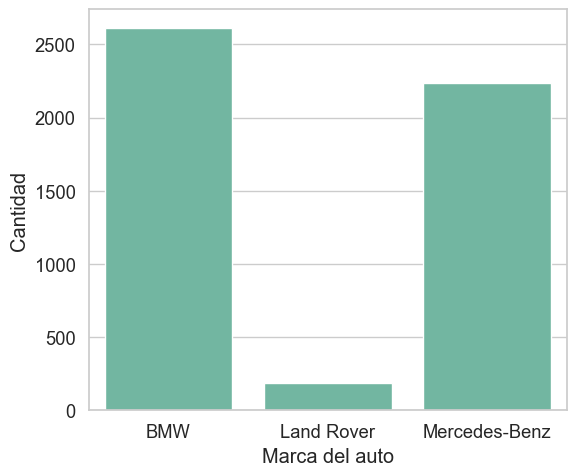

In [4]:
name_car = ['Land Rover', 'BMW', 'Mercedes-Benz']
high_end_cars = df[df['manufacturer_name'].isin(name_car)]
track_data_reduction(df, high_end_cars, filter_name='Marcas de autos')

plt.figure(figsize=(6,5))
sns.countplot(high_end_cars, x= 'manufacturer_name')
plt.xlabel('Marca del auto')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.show()

Vemos que las marcas BMW y Mercedes-Benz tienen una cantidad alta de autos en el dataset, mientras que Land Rover tiene menos representación. Esto podría influir en la variedad de opciones disponibles para cada marca.

## Tipo de motor y transmisión

Ahora, se filtrarán los datos para incluir solo autos con motor a gasolina o híbrido y con transmisión automática 

In [5]:
type_fuel_and_transmission_automatic= high_end_cars[(high_end_cars['engine_fuel'].isin(['gasoline', 'hybrid-petrol'])) &
                                     (high_end_cars['transmission'] == 'automatic')]

track_data_reduction(high_end_cars, type_fuel_and_transmission_automatic, filter_name='Tipo de motor y transmisión automática')
type_fuel_and_transmission_automatic.head()

Tipo de motor y transmisión automática: 5031 -> 1606 filas (3425 eliminadas, 68.1% reducción)


,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,duration_listed
2875,BMW,323,automatic,black,333000,1999-01-01,gasoline,False,gasoline,2.5,sedan,False,owned,rear,4950.0,True,Минская обл.,23,31,43
2876,BMW,730,automatic,black,299000,2008-01-01,gasoline,False,gasoline,3.0,sedan,False,owned,rear,13500.0,False,Минская обл.,11,1,0
2880,BMW,X5,automatic,silver,325000,2004-01-01,gasoline,False,gasoline,3.0,suv,False,owned,all,8300.0,False,Минская обл.,17,10,17
2882,BMW,745,automatic,grey,280000,2002-01-01,gasoline,False,gasoline,4.4,sedan,False,owned,rear,5800.0,True,Витебская обл.,4,4,4
2883,BMW,540,automatic,black,310000,1997-01-01,gasoline,False,gasoline,4.4,sedan,False,owned,rear,4000.0,False,Минская обл.,3,41,105


## Kilometraje bajo y año de producción alto

Para identificar autos con bajo kilometraje y año de producción alto (preferencias del cliente), se crea un gráfico de dispersión que relaciona ambas variables en los autos filtrados. Esto guiará el próximo filtrado.

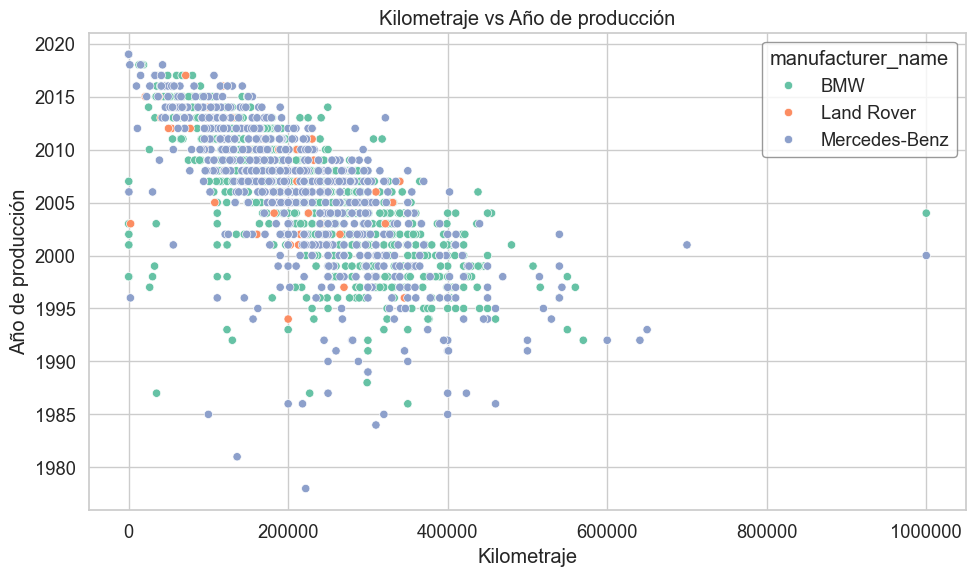

In [6]:
plt.figure(figsize=(10,6))
sns.scatterplot(type_fuel_and_transmission_automatic, x = 'odometer_value', y = 'year_produced', hue='manufacturer_name')

plt.xlabel('Kilometraje')
plt.ylabel('Año de producción')
plt.title('Kilometraje vs Año de producción')
plt.ticklabel_format(style='plain', axis='x')
plt.tight_layout()
plt.show()

Podemos ver que hay una tendencia clara: a medida que aumenta el año de producción, el kilometraje tiende a ser menor. Esto es lógico, ya que los autos más nuevos generalmente han sido conducidos menos kilómetros. Con base a esto, filtraremos los autos que tienen un kilometraje menor a 100,000 km y un año de producción a partir de 2015.

Kilometraje bajo y Año de producción alto: 1606 -> 48 filas (1558 eliminadas, 97.0% reducción)


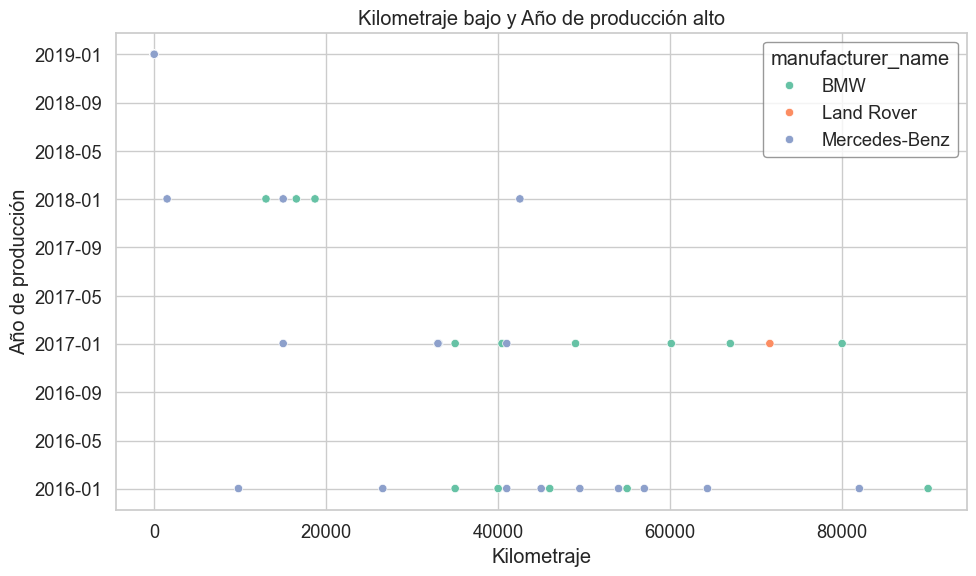

In [7]:
low_odometer = type_fuel_and_transmission_automatic[type_fuel_and_transmission_automatic['odometer_value'] <= 100000]
production_year_2015 = low_odometer[low_odometer['year_produced'] > '2015-01-01']

track_data_reduction(type_fuel_and_transmission_automatic, production_year_2015, filter_name='Kilometraje bajo y Año de producción alto')
plt.figure(figsize=(10,6))
sns.scatterplot(production_year_2015, x = 'odometer_value', y = 'year_produced', hue='manufacturer_name')

plt.xlabel('Kilometraje')
plt.ylabel('Año de producción')
plt.title('Kilometraje bajo y Año de producción alto')
plt.ticklabel_format(style='plain', axis='x')
plt.tight_layout()
plt.show()

Al realizar este filtrado, obtenemos un conjunto de datos más manejable y relevante para las preferencias del cliente. Ahora, podemos proceder a analizar el estado de los autos restantes, donde buscamos que sean autos que no hayan sido reparados sino que sean nuevos, ya que esto es crucial para garantizar la calidad y confiabilidad del vehículo.

In [8]:
state_new = production_year_2015[production_year_2015['state'] == 'new']

features_to_show = state_new[['manufacturer_name', 'model_name', 'year_produced','engine_fuel', 'transmission','price_usd', 'odometer_value']]

mercedes_benz = features_to_show[features_to_show['manufacturer_name'] == 'Mercedes-Benz']
bmw = features_to_show[features_to_show['manufacturer_name'] == 'BMW']

track_data_reduction(production_year_2015, state_new, filter_name='Autos en estado nuevo')
print('\nAutos seleccionados de la marca Mercedes-Benz')
display(mercedes_benz) 
print('\nAutos seleccionados de la marca BMW')
display(bmw) 

Autos en estado nuevo: 48 -> 11 filas (37 eliminadas, 77.1% reducción)

Autos seleccionados de la marca Mercedes-Benz


,manufacturer_name,model_name,year_produced,engine_fuel,transmission,price_usd,odometer_value
9421,Mercedes-Benz,CLA200,2019-01-01,gasoline,automatic,35500.00,0
9517,Mercedes-Benz,C180,2019-01-01,gasoline,automatic,38850.75,0
9530,Mercedes-Benz,C180,2019-01-01,gasoline,automatic,44573.81,0
9531,Mercedes-Benz,E200,2019-01-01,gasoline,automatic,48976.16,0
9532,Mercedes-Benz,GLC200,2019-01-01,gasoline,automatic,49416.40,0
9533,Mercedes-Benz,CLA200,2019-01-01,gasoline,automatic,36869.69,0
9534,Mercedes-Benz,A200,2019-01-01,gasoline,automatic,34228.29,0
9799,Mercedes-Benz,A200,2019-01-01,gasoline,automatic,25500.00,0
9806,Mercedes-Benz,GLA200,2019-01-01,gasoline,automatic,31500.00,0
9807,Mercedes-Benz,A200,2019-01-01,gasoline,automatic,32900.00,0



Autos seleccionados de la marca BMW


,manufacturer_name,model_name,year_produced,engine_fuel,transmission,price_usd,odometer_value
3119,BMW,X3,2019-01-01,gasoline,automatic,47325.28,0


## Conclusión

Después de aplicar todos los filtros solicitados por el cliente, observamos que, entre las marcas de lujo consideradas, Mercedes-Benz ofrece la mayor variedad de autos que cumplen con todos los criterios establecidos. Por su parte, BMW presenta únicamente el BMW X3 como opción viable, mientras que Land Rover no cuenta con modelos que satisfagan todos los requisitos del cliente.

En resumen, Mercedes-Benz emerge como la opción más versátil para el cliente interesado en vehículos de lujo con las características deseadas. Se recomienda revisar los modelos específicos de Mercedes-Benz para comparar precios y características adicionales, priorizando aquellos con el mejor equilibrio entre costo y prestaciones para maximizar la inversión a largo plazo.